# K-Means Clustering for Gene Expression Data

**Problem Description**:
The goal is to cluster 8 genes based on their expression values from two microarray experiments.

### Input:
- Expression values (`exp1` and `exp2`) for each gene from a table.

### Objective:
- Apply the K-Means algorithm to divide the genes into two distinct clusters based on their expression behavior.

### Initial Centroids:
- The expression values of Gene7 and Gene8 are given as initial centroids.

### Output:
- Cluster labels for each gene and the final centroids.
- Final centroid coordinates after convergence.


### Additional Features:
The program will also show:
1. The cluster to which each gene belongs.
2. The coordinates of centroids for each iteration.

# Step 1: Import Necessary Libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 2: Define Gene Expression Data

- The table contains 8 genes with their expression values from two experiments (`exp1` and `exp2`).
- Negative values indicate downregulation, and positive values indicate upregulation.

In [30]:
data = np.array([
    [-4, -3],                                            # gene1
    [6, 5],                                              # gene2
    [1, -7],                                             # gene3
    [-4, -6],                                            # gene4
    [4, 6],                                              # gene5
    [-1, 5],                                             # gene6
    [-3, 0],                                             # gene7
    [3, 0]                                               # gene8
])
gene_labels = [f"gene{i+1}" for i in range(len(data))]   # Generate gene labels

# Step 3: Specify Initial Centroids

- According to the task, Gene7 and Gene8 are used as the initial centroids:
  - Gene7: `(-3, 0)`
  - Gene8: `(3, 0)`

In [31]:
initial_centers = np.array([
    [-3, 0],                                             # gene7
    [3, 0]                                               # gene8
])

# Step 4: Manual Implementation of K-Means Algorithm with Iteration Tracking

  1. Track the positions of centroids at each iteration.
  2. Record the cluster assignments of each data point at every step.
  3. Ensure transparency in how the algorithm converges.

- The algorithm stops when cluster assignments no longer change (i.e., it has converged).

In [34]:
def kmeans_integrated(data, initial_centers):
    centers = initial_centers.copy()
    n_samples = data.shape[0]
    clusters = np.zeros(n_samples, dtype=int)
    iteration = 0
    iteration_data = []

    while True:
        print(f"\nIteration {iteration + 1}:")
        old_clusters = clusters.copy()

        # Step 1: Assign clusters based on the nearest center
        for i in range(n_samples):
            distances = np.linalg.norm(data[i] - centers, axis=1)
            clusters[i] = np.argmin(distances)

        # Step 2: Save cluster assignments
        iteration_data.append((clusters.copy(), centers.copy()))

        # Print cluster assignments
        print("Cluster assignments:", clusters + 1)

        # Step 3: Update cluster centers
        new_centers = np.array([
            data[clusters == k].mean(axis=0) if np.any(clusters == k) else centers[k]
            for k in range(centers.shape[0])
        ])

        # Print centroids
        print("Centroids:", new_centers)

        # Step 4: Check if cluster assignments are unchanged
        if np.array_equal(clusters, old_clusters):
            print("\nConverged!")
            break

        centers = new_centers
        iteration += 1

    return clusters, centers, iteration_data

# Run the K-means algorithm
clusters, final_centers, iteration_data = kmeans_integrated(data, initial_centers)


Iteration 1:
Cluster assignments: [1 2 2 1 2 1 1 2]
Centroids: [[-3.  -1. ]
 [ 3.5  1. ]]

Iteration 2:
Cluster assignments: [1 2 1 1 2 2 1 2]
Centroids: [[-2.5 -4. ]
 [ 3.   4. ]]

Iteration 3:
Cluster assignments: [1 2 1 1 2 2 1 2]
Centroids: [[-2.5 -4. ]
 [ 3.   4. ]]

Converged!


# Step 5: Display Iteration Data and Results

- This step shows how the clusters and centroids change during each iteration.
- For each iteration:
  1. Which data point belongs to which cluster.
  2. The positions of the centroids.

In [37]:
iteration_results = []

# Save Initialization
assignments, centroids = iteration_data[0]
iteration_results.append({
    "Step": "Initialization",
    "Cluster Assignments": (assignments + 1).tolist(),  # Convert to 1-based indexing
    "Centroids": centroids.tolist()
})

# Save Iteration Steps
for i, (assignments, centroids) in enumerate(iteration_data[1:], start=1):
    iteration_results.append({
        "Step": f"Iteration {i}",
        "Cluster Assignments": (assignments + 1).tolist(),  # Convert to 1-based indexing
        "Centroids": centroids.tolist()
    })

# Print Results
for result in iteration_results:
    print(f"{result['Step']}:")
    print(f"  Cluster Assignments: {result['Cluster Assignments']}")
    print(f"  Centroids: {result['Centroids']}\n")

Initialization:
  Cluster Assignments: [1, 2, 2, 1, 2, 1, 1, 2]
  Centroids: [[-3, 0], [3, 0]]

Iteration 1:
  Cluster Assignments: [1, 2, 1, 1, 2, 2, 1, 2]
  Centroids: [[-3.0, -1.0], [3.5, 1.0]]

Iteration 2:
  Cluster Assignments: [1, 2, 1, 1, 2, 2, 1, 2]
  Centroids: [[-2.5, -4.0], [3.0, 4.0]]



### Cluster Assignments and Centroid Coordinates at Each Iteration
**Initialization**:
- **Cluster Assignments**: `[1, 2, 2, 1, 2, 1, 1, 2]`
  - Cluster 1 (label `1`): `gene1`, `gene4`, `gene7`
  - Cluster 2 (label `2`): `gene2`, `gene3`, `gene5`, `gene6`, `gene8`
- **Centroids**:
  - Cluster 1: `[-3, 0]`
  - Cluster 2: `[3, 0]`

**Iteration 1**:
- **Cluster Assignments**: `[1, 2, 1, 1, 2, 2, 1, 2]`
  - Cluster 1 (label `1`): `gene1`, `gene3`, `gene4`, `gene7`
  - Cluster 2 (label `2`): `gene2`, `gene5`, `gene6`, `gene8`
- **Centroids**:
  - Cluster 1: `[-3.0, -1.0]`
  - Cluster 2: `[3.5, 1.0]`

**Iteration 2**:
- **Cluster Assignments**: `[1, 2, 1, 1, 2, 2, 1, 2]`
  - Cluster 1 (label `1`): `gene1`, `gene3`, `gene4`, `gene7`
  - Cluster 2 (label `2`): `gene2`, `gene5`, `gene6`, `gene8`
- **Centroids**:
  - Cluster 1: `[-2.5, -4.0]`
  - Cluster 2: `[3.0, 4.0]`

**Summary**:
- The algorithm converges after 2 iterations.
- Cluster memberships stabilize after the second iteration.
- Final centroids represent the average positions of the data points in each cluster.

In [39]:
final_assignments, final_centroids = iteration_data[-1]

# Print Final Clustering Results
print("Final Clustering Results:")
final_results = pd.DataFrame(data, columns=['exp1', 'exp2'])
final_results['Cluster'] = final_assignments + 1  # Adjust clusters to be 1-indexed
final_results['Gene'] = [f"gene{i+1}" for i in range(len(data))]
print(final_results)

print("\nFinal Centroids:")
print(final_centroids)

Final Clustering Results:
   exp1  exp2  Cluster   Gene
0    -4    -3        1  gene1
1     6     5        2  gene2
2     1    -7        1  gene3
3    -4    -6        1  gene4
4     4     6        2  gene5
5    -1     5        2  gene6
6    -3     0        1  gene7
7     3     0        2  gene8

Final Centroids:
[[-2.5 -4. ]
 [ 3.   4. ]]


### Final Result Analysis:
- **Cluster 1**: `[-2.5, -4.0]` — Represents genes with **lower expression levels** (downregulated behavior) in both experiments.
- **Cluster 2**: `[3.0, 4.0]` — Represents genes with **higher expression levels** (upregulated behavior) in both experiments.
- The key difference lies in the expression magnitude: Cluster 1 shows suppressed activity, while Cluster 2 shows enhanced activity.


# Step 6: Visualize the Final Clustering
- To provide a visual representation of the clustering results.
- Highlight the distinct clusters, centroids, and labeled data points for better interpretability.

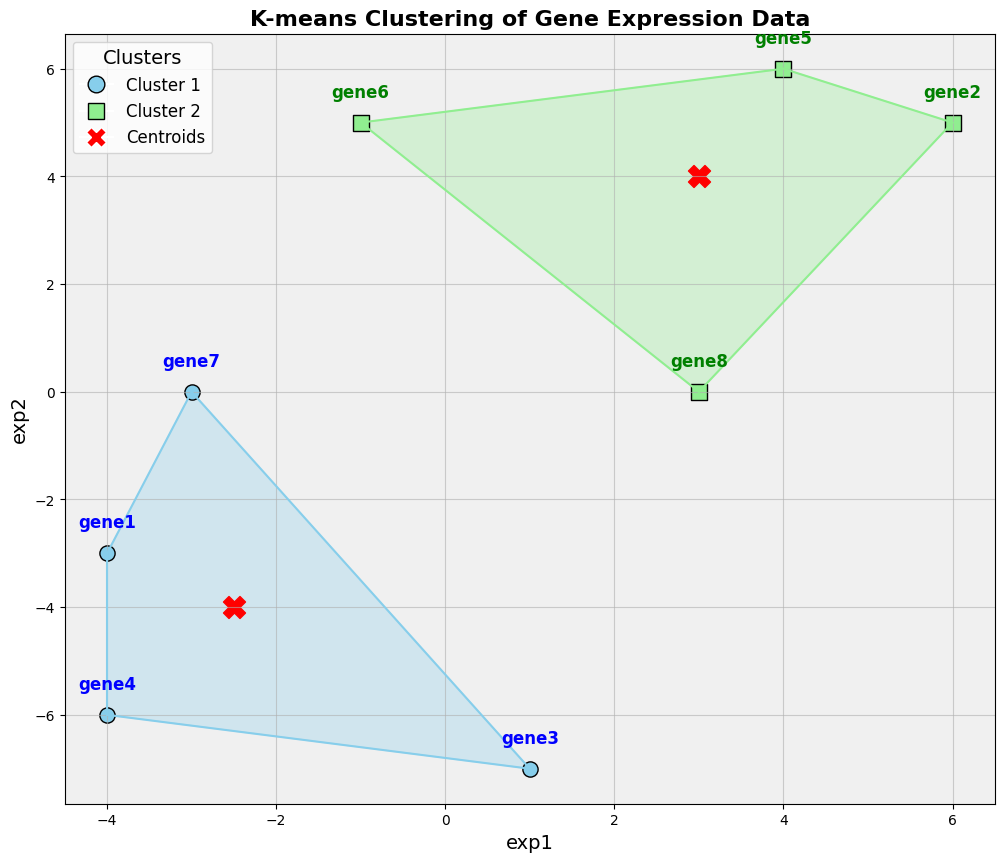

In [40]:
plt.figure(figsize=(12, 10))
plt.gca().set_facecolor('#f0f0f0')  # Set light gray background color
colors = ['skyblue', 'lightgreen']  # Colors for clusters
label_colors = ['blue', 'green']  # More visible label colors matching cluster regions
markers = ['o', 's']  # Markers for different clusters
from scipy.spatial import ConvexHull
def plot_convex_hull(points, cluster_label, color, alpha=0.3):
    if len(points) > 2:  # Convex hull requires at least 3 points
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], color=color, lw=1.5)
        # Fill the convex hull area with a transparent color
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], color=color, alpha=alpha)
# Plot convex hulls and cluster points with specific markers
for cluster_label in np.unique(final_assignments):
    cluster_points = data[final_assignments == cluster_label]
    plot_convex_hull(cluster_points, cluster_label, colors[cluster_label])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_label + 1}",
                c=colors[cluster_label], s=120, marker=markers[cluster_label], edgecolor='black')
    # Annotate each point with its gene label directly above in visible cluster-specific color
for i, point in enumerate(data):
    cluster_color = label_colors[final_assignments[i]]
    plt.text(point[0], point[1] + 0.4, gene_labels[i], fontsize=12, ha='center', va='bottom', color=cluster_color, fontweight='bold')
    # Plot centroids with a distinct marker
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='X', s=250, label="Centroids")
# Add legend with customized markers and labels
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Cluster 1', markerfacecolor='skyblue', markersize=12, markeredgecolor='black'),
    Line2D([0], [0], marker='s', color='w', label='Cluster 2', markerfacecolor='lightgreen', markersize=12, markeredgecolor='black'),
    Line2D([0], [0], marker='X', color='w', label='Centroids', markerfacecolor='red', markersize=14)
]
plt.legend(handles=legend_elements, title="Clusters", fontsize=12, title_fontsize=14)
# Add labels, title, and grid
plt.title("K-means Clustering of Gene Expression Data", fontsize=16, fontweight='bold')
plt.xlabel("exp1", fontsize=14)
plt.ylabel("exp2", fontsize=14)
plt.grid(True, alpha=0.6)
plt.show()

### K-Means Clustering Results for Gene Expression Data

The genes are grouped into two clusters based on their expression levels in two experiments (`exp1` and `exp2`):

1. **Cluster 1 (Blue)**:
   - Genes: `gene1`, `gene3`, `gene4`, `gene7`
   - Centroid: `[-2.5, -4.0]`
   - Characteristics: Genes with lower expression levels (downregulated), located in the lower-left quadrant.

2. **Cluster 2 (Green)**:
   - Genes: `gene2`, `gene5`, `gene6`, `gene8`
   - Centroid: `[3.0, 4.0]`
   - Characteristics: Genes with higher expression levels (upregulated), located in the upper-right quadrant.


# Overall Summary

This assignment demonstrates the application of the K-Means clustering algorithm on gene expression data from two experiments. The analysis successfully grouped the genes into two clusters based on their expression levels, highlighting distinct patterns of upregulated and downregulated behaviors. The process included data visualization, iterative centroid updates, and cluster assignments, culminating in a clear and intuitive final plot.